section

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import style
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import f1_score

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('dataset_assignment.csv',na_values='?')

In [4]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,+


eda


In [4]:
df.describe()

,F2,F3,F8,F11,F14,F15
count,677.000000,689.000000,689.000000,689.000000,676.000000,689.000000
mean,31.569261,4.765631,2.224819,2.402032,183.988166,1018.862119
std,11.966670,4.978470,3.348739,4.866180,173.934087,5213.743149
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.000000,0.165000,0.000000,74.500000,0.000000
50%,28.420000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.250000,2.625000,3.000000,277.000000,396.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


the data is not symetric 
and it is not in the same scale 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      677 non-null    object 
 1   F2      677 non-null    float64
 2   F3      689 non-null    float64
 3   F4      683 non-null    object 
 4   F5      683 non-null    object 
 5   F6      680 non-null    object 
 6   F7      680 non-null    object 
 7   F8      689 non-null    float64
 8   F9      689 non-null    object 
 9   F10     689 non-null    object 
 10  F11     689 non-null    int64  
 11  F12     689 non-null    object 
 12  F13     689 non-null    object 
 13  F14     676 non-null    float64
 14  F15     689 non-null    int64  
 15  Class   689 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


In [8]:
missing=df.isna().sum().sort_values(ascending=False)
missing

F14      13
F1       12
F2       12
F6        9
F7        9
F4        6
F5        6
F3        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F15       0
Class     0
dtype: int64

In [96]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [97]:
style.use('fivethirtyeight')

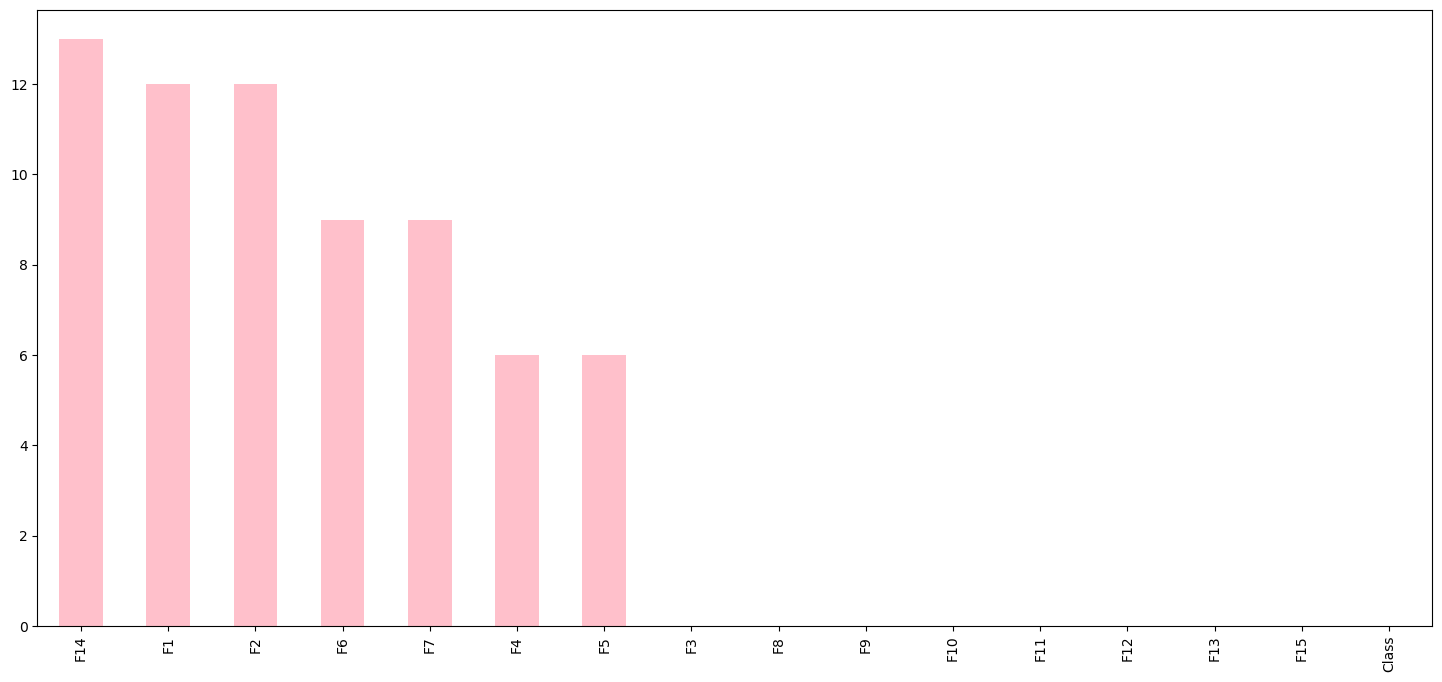

In [7]:
plt.figure(figsize=(18,8))
missing.plot(kind='bar',color='pink')
plt.show()

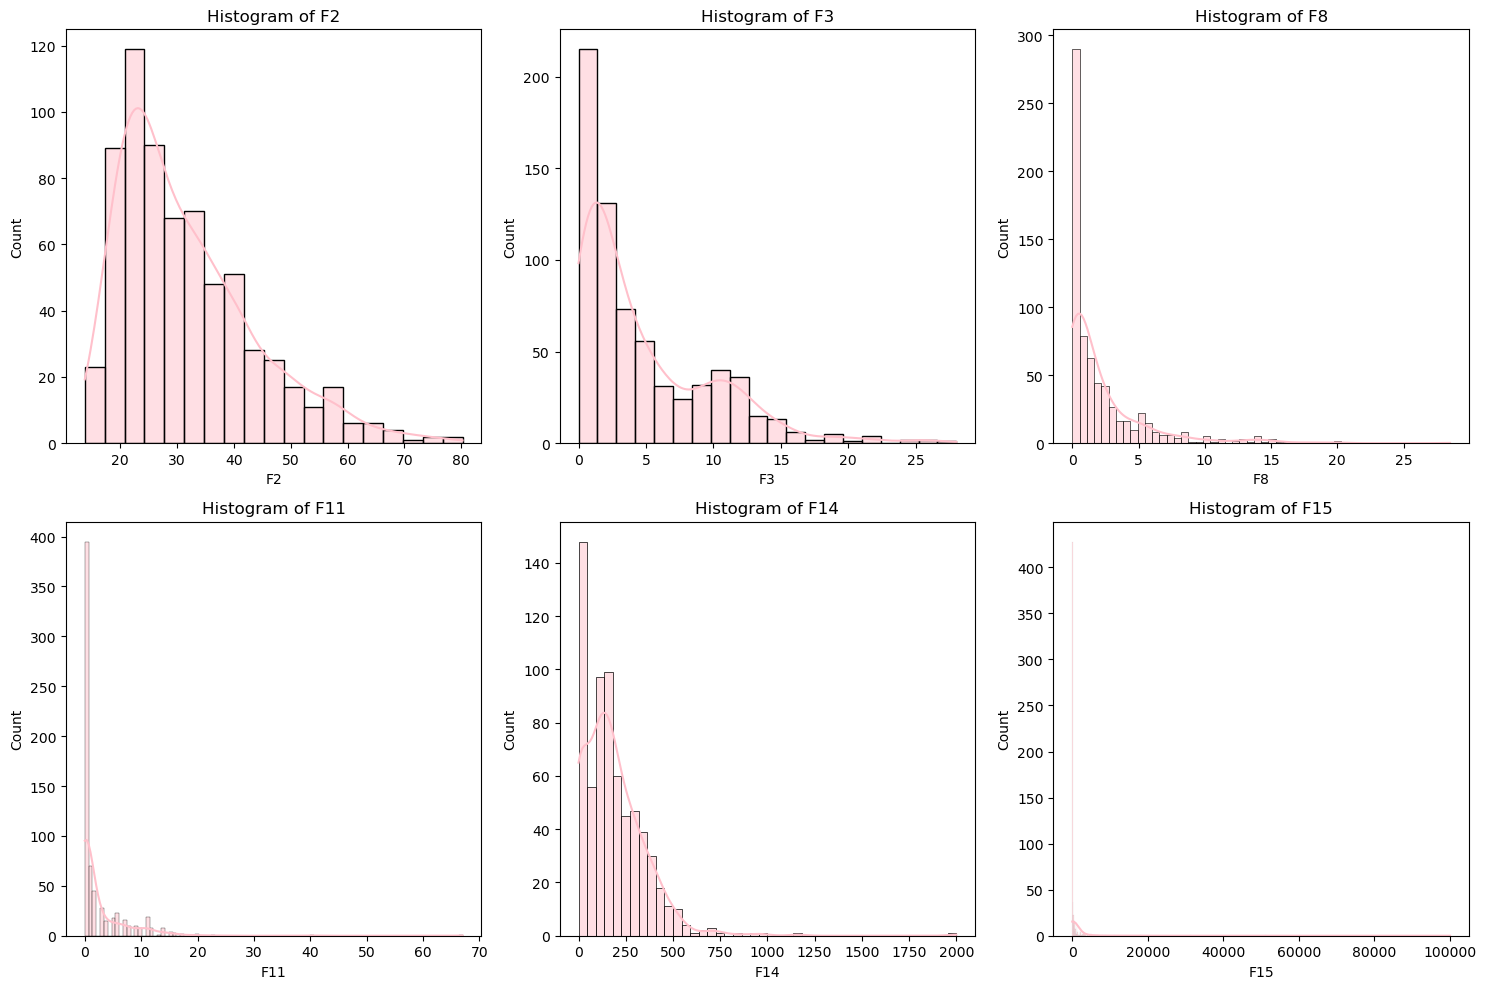

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define the number of rows and columns for the grid
num_features = len(df.select_dtypes(include=['number']).columns)
num_cols = 3  # Number of columns
num_rows = math.ceil(num_features / num_cols)  # Calculate required rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each numeric feature
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    sns.histplot(data=df, x=column, color='pink', kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


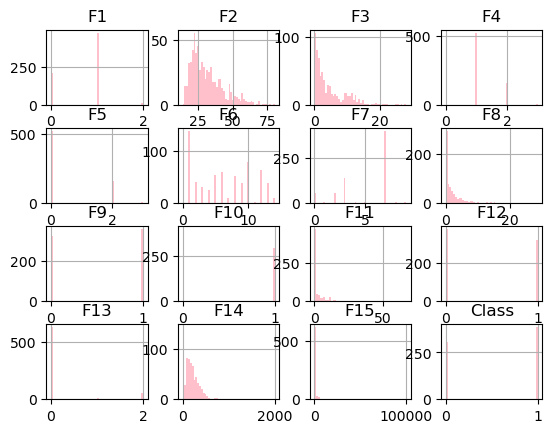

In [21]:
df.hist(bins=50,color='pink')
plt.show()

<Axes: >

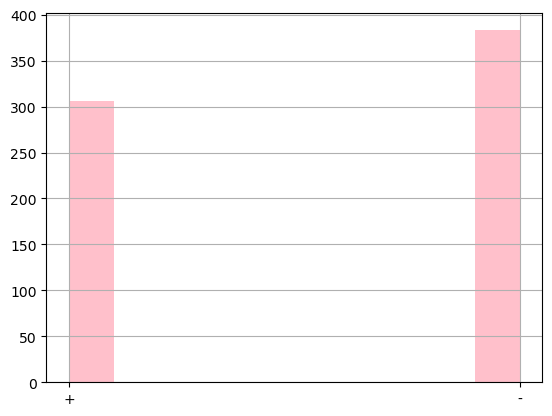

In [14]:
df['Class'].hist(color='pink')

In [15]:
numeric_columns=df.select_dtypes(exclude='object')
numeric_columns.columns

Index(['F2', 'F3', 'F8', 'F11', 'F14', 'F15'], dtype='object')

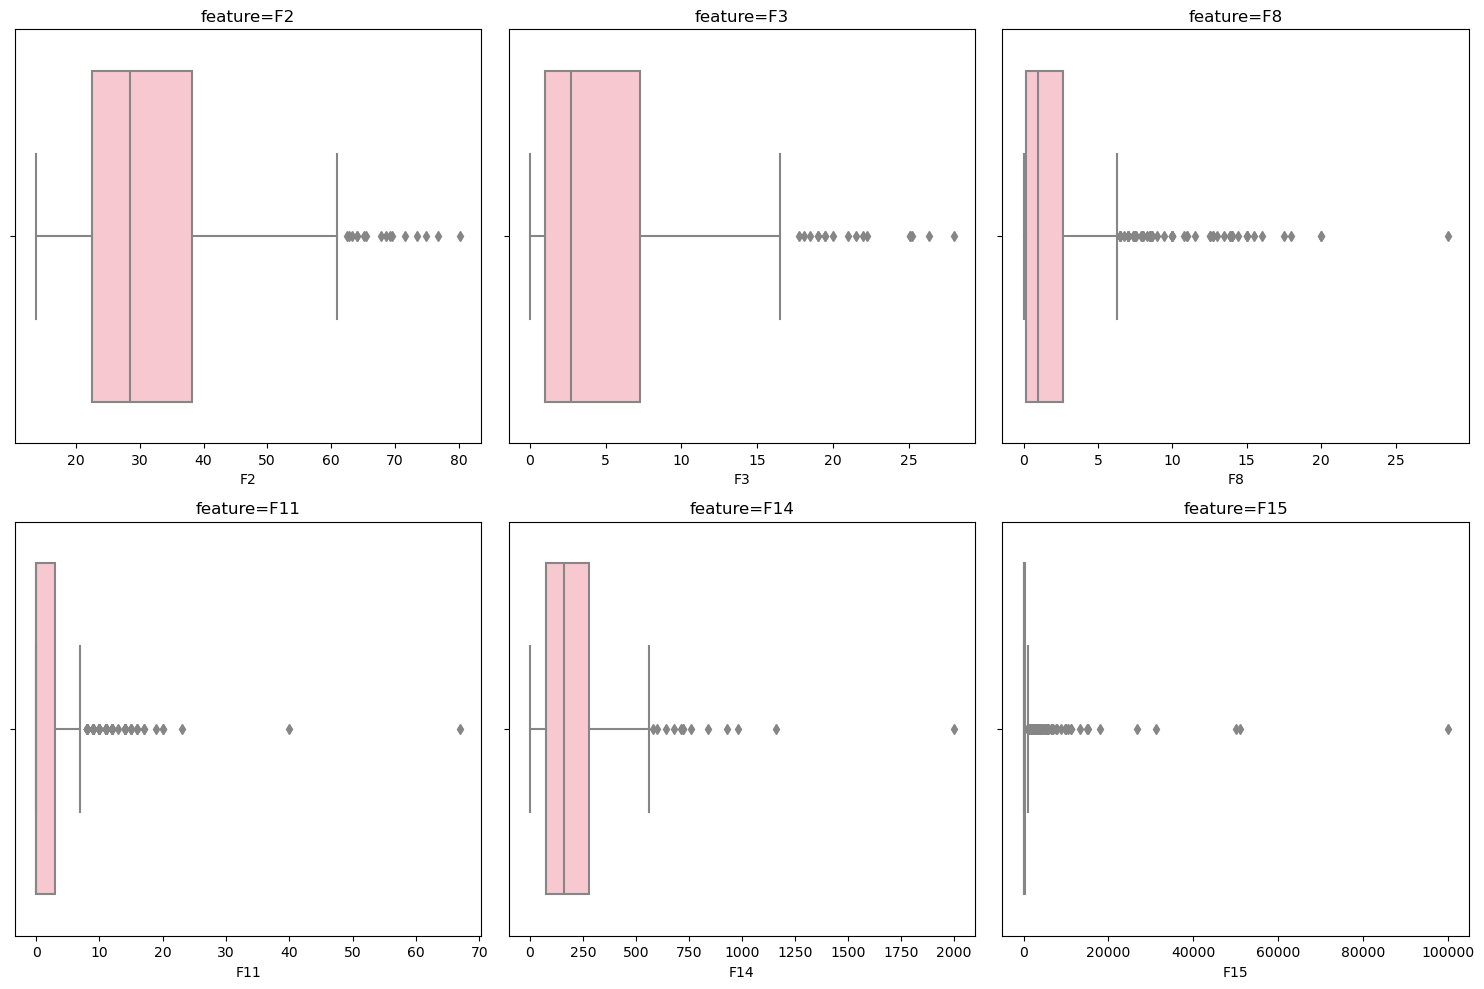

In [16]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, data=df,color='pink')
    plt.title(f'feature={col}')
plt.tight_layout()
plt.show()

transformation 

In [6]:
# Calculate the Z-scores of each numerical column in the raw data and write
# them into a new DataFrame named df_norm.

feature_mean = df.mean(numeric_only=True)
feature_std = df.std(numeric_only=True)
numerical_features = df.select_dtypes('number').columns
normalized_dataset = (
    df[numerical_features] - feature_mean
) / feature_std

# Copy the class to the new dataframe
normalized_dataset['Class'] = df['Class']

# Examine some of the values of the normalized training set. Notice that most
# Z-scores fall between -2 and +2.
normalized_dataset.head()

,F2,F3,F8,F11,F14,F15,Class
0,2.264685,-0.061391,0.243429,0.739382,-0.810584,-0.088010,+
1,-0.590746,-0.856816,-0.216445,-0.493618,0.552001,-0.037375,+
2,-0.312473,-0.647916,0.455450,0.533882,-0.482874,-0.194843,+
3,-0.952584,0.172617,-0.153735,-0.493618,-0.367887,-0.195419,+
4,0.042680,-0.153788,0.082175,-0.493618,1.011946,-0.195419,+


In [7]:
categorical_columns=df.select_dtypes(include='object')
categorical_columns.columns

Index(['F1', 'F4', 'F5', 'F6', 'F7', 'F9', 'F10', 'F12', 'F13', 'Class'], dtype='object')

In [8]:
# the data is ordered so im going to use label encoder 
# encoding categorical features 
le=LabelEncoder()
for col in categorical_columns:
    df[col]=le.fit_transform(df[col])




In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      689 non-null    int32  
 1   F2      677 non-null    float64
 2   F3      689 non-null    float64
 3   F4      689 non-null    int32  
 4   F5      689 non-null    int32  
 5   F6      689 non-null    int32  
 6   F7      689 non-null    int32  
 7   F8      689 non-null    float64
 8   F9      689 non-null    int32  
 9   F10     689 non-null    int32  
 10  F11     689 non-null    int64  
 11  F12     689 non-null    int32  
 12  F13     689 non-null    int32  
 13  F14     676 non-null    float64
 14  F15     689 non-null    int64  
 15  Class   689 non-null    int32  
dtypes: float64(4), int32(10), int64(2)
memory usage: 59.3 KB


In [9]:
df.isna().sum().sort_values(ascending=False)

F14      13
F2       12
F1        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F15       0
Class     0
dtype: int64

In [25]:
# print the percentage of nan values of each column
print( ((df.isnull().sum()/len(df))*100).sort_values(ascending=False))

F14      1.886792
F2       1.741655
F1       0.000000
F3       0.000000
F4       0.000000
F5       0.000000
F6       0.000000
F7       0.000000
F8       0.000000
F9       0.000000
F10      0.000000
F11      0.000000
F12      0.000000
F13      0.000000
F15      0.000000
Class    0.000000
dtype: float64


In [16]:
#impute the median since we have outliers
df['F2']=df['F2'].fillna(df['F2'].median())
df['F14']=df['F14'].fillna(df['F14'].median())


In [112]:
# #feature scaling on numeric features 
# # splitting data 
# X=df.drop(columns='Class')
# y=df['Class']
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# scaler=StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

array([[<Axes: title={'center': 'F1'}>, <Axes: title={'center': 'F2'}>,
        <Axes: title={'center': 'F3'}>, <Axes: title={'center': 'F4'}>],
       [<Axes: title={'center': 'F5'}>, <Axes: title={'center': 'F6'}>,
        <Axes: title={'center': 'F7'}>, <Axes: title={'center': 'F8'}>],
       [<Axes: title={'center': 'F9'}>, <Axes: title={'center': 'F10'}>,
        <Axes: title={'center': 'F11'}>, <Axes: title={'center': 'F12'}>],
       [<Axes: title={'center': 'F13'}>, <Axes: title={'center': 'F14'}>,
        <Axes: title={'center': 'F15'}>,
        <Axes: title={'center': 'Class'}>]], dtype=object)

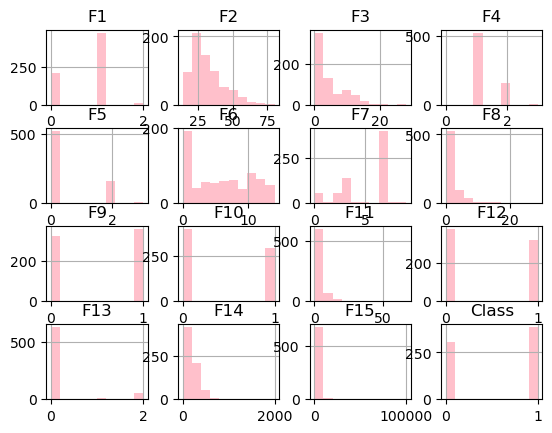

In [29]:
df.hist(color='pink')

In [114]:
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

array([[<Axes: title={'center': 'F1'}>, <Axes: title={'center': 'F2'}>,
        <Axes: title={'center': 'F3'}>, <Axes: title={'center': 'F4'}>],
       [<Axes: title={'center': 'F5'}>, <Axes: title={'center': 'F6'}>,
        <Axes: title={'center': 'F7'}>, <Axes: title={'center': 'F8'}>],
       [<Axes: title={'center': 'F9'}>, <Axes: title={'center': 'F10'}>,
        <Axes: title={'center': 'F11'}>, <Axes: title={'center': 'F12'}>],
       [<Axes: title={'center': 'F13'}>, <Axes: title={'center': 'F14'}>,
        <Axes: title={'center': 'F15'}>, <Axes: >]], dtype=object)

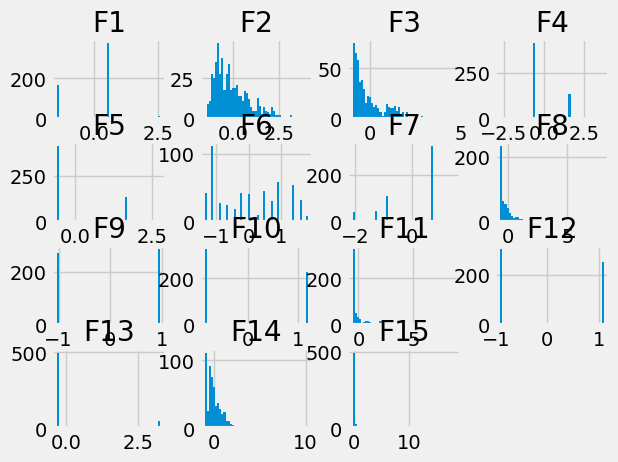

In [115]:
# X_train_scaled.hist(bins=50)

In [11]:
skewed=df.skew().sort_values(ascending=False)
skewed

F15      13.131421
F11       5.148510
F13       2.901759
F8        2.888543
F14       2.754821
F3        1.487806
F4        1.324851
F5        1.226818
F2        1.166330
F10       0.297027
F6        0.196306
F12       0.166389
F9       -0.090273
Class    -0.225412
F1       -0.487491
F7       -0.715628
dtype: float64

In [45]:
features=skewed['F15':'F2']
type(features)

pandas.core.series.Series

In [47]:
for feature in features.index:

    df[feature] = np.log1p(df[feature])
# data['Lender_portion_to_be_repaid'] = np.log1p(data['Lender_portion_to_be_repaid'])



In [48]:
df.skew().sort_values(ascending=False)

F13      2.853262
F5       1.186480
F11      1.050186
F4       0.996296
F8       0.818947
F15      0.508108
F2       0.424495
F10      0.297027
F6       0.196306
F3       0.172931
F12      0.166389
F9      -0.090273
Class   -0.225412
F1      -0.487491
F7      -0.715628
F14     -1.292223
dtype: float64

In [35]:
correlation_matrix=df.corr()
correlation_matrix

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
F1,1.000000,0.031654,-0.050858,0.069122,0.068793,-0.002643,0.060872,0.070426,-0.050727,-0.086996,-0.038046,0.046471,0.090674,0.101353,-0.007168,0.042152
F2,0.031654,1.000000,0.202241,-0.072058,-0.089980,0.040682,-0.160617,0.391444,0.204649,0.086248,0.187336,0.053539,-0.015900,-0.079870,0.018705,-0.164359
F3,-0.050858,0.202241,1.000000,-0.122698,-0.105852,-0.003657,-0.053550,0.298714,0.245968,0.176742,0.271003,-0.014318,-0.122764,-0.222026,0.122935,-0.208171
F4,0.069122,-0.072058,-0.122698,1.000000,0.979410,0.024956,0.034701,-0.100849,-0.160521,-0.183996,-0.118544,-0.040202,0.013400,-0.003441,-0.119897,0.164173
F5,0.068793,-0.089980,-0.105852,0.979410,1.000000,0.002166,0.016756,-0.090505,-0.167577,-0.192084,-0.123755,-0.022122,0.022853,0.008756,-0.030259,0.164755
F6,-0.002643,0.040682,-0.003657,0.024956,0.002166,1.000000,0.046386,0.011934,0.073985,0.090722,-0.011810,0.047901,0.040208,0.065077,-0.002203,-0.126385
F7,0.060872,-0.160617,-0.053550,0.034701,0.016756,0.046386,1.000000,-0.108687,-0.045640,-0.012529,-0.040873,-0.014366,0.049306,-0.020117,-0.018789,0.000352
F8,0.070426,0.391444,0.298714,-0.100849,-0.090505,0.011934,-0.108687,1.000000,0.346342,0.223702,0.322247,0.137844,-0.020665,-0.075663,0.051267,-0.323260
F9,-0.050727,0.204649,0.245968,-0.160521,-0.167577,0.073985,-0.045640,0.346342,1.000000,0.431133,0.380206,0.092667,-0.113266,-0.066029,0.090345,-0.719987
F10,-0.086996,0.086248,0.176742,-0.183996,-0.192084,0.090722,-0.012529,0.223702,0.431133,1.000000,0.572573,0.018616,-0.242289,-0.052497,0.078058,-0.457284


<Axes: >

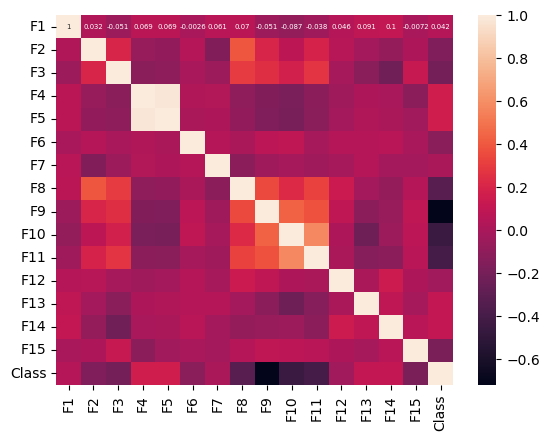

In [36]:
sns.heatmap(correlation_matrix,annot=True,annot_kws={'fontsize':5})

In [51]:
# plt.figure(figsize=(10, 10))
# for i, col in enumerate(df, 1):
#     plt.subplot(2, 3, i)
#     sns.boxplot(x=col, data=df)
#     plt.title(f'feature={col}')
# plt.tight_layout()
# plt.show()

In [18]:
#split data 



In [36]:
X.isnull().sum()

F2     0
F3     0
F8     0
F11    0
F14    0
F15    0
dtype: int64

In [30]:
normalized_dataset.isnull().sum()

F2       0
F3       0
F8       0
F11      0
F14      0
F15      0
Class    0
dtype: int64

In [32]:
#impute the median since we have outliers
normalized_dataset['F2']=normalized_dataset['F2'].fillna(normalized_dataset['F2'].median())
normalized_dataset['F14']=normalized_dataset['F14'].fillna(normalized_dataset['F14'].median())

In [40]:
categorical_columns=normalized_dataset.select_dtypes(include='object')
categorical_columns.columns
le=LabelEncoder()
for col in categorical_columns:
    normalized_dataset[col]=le.fit_transform(normalized_dataset[col])

In [41]:
y=normalized_dataset['Class']
X=normalized_dataset.drop('Class',axis=1)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((551, 6), (138, 6), (551,), (138,))

In [44]:

# Logistic Regression Classifier
clf = LogisticRegression(
    random_state=42,
    class_weight="balanced",  # Handle class imbalance
)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation Metrics
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")

F1 Score: 0.7730


In [45]:
y.value_counts()


Class
1    383
0    306
Name: count, dtype: int64

## Feature Importance


In [67]:
print(f"Shape of clf.coef_: {clf.coef_.shape}")


Shape of clf.coef_: (1, 15)


In [46]:
features_for_modelling = X_train.columns.tolist()  
print(len(features_for_modelling))


6


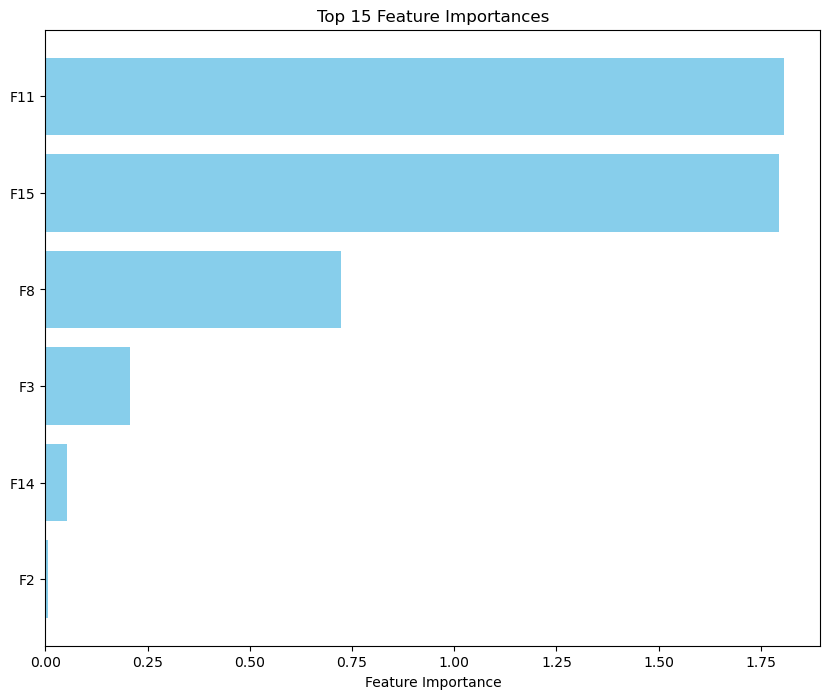

In [48]:

# Get the absolute values of the coefficients
feature_importances = np.abs(clf.coef_).flatten()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features_for_modelling,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top  feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances')
plt.show()